# `isochrones`

https://github.com/timothydmorton/isochrones

Stellar model grid interpolation and star-property fitting

## What?

Use grids of stellar models to...

- Infer physical properties of exoplanet host stars
- Model potential transiting planet false positive scenarios
- Characterize visual binary systems
- Infer properties of star clusters

...conditioned on observations (broadband photometry, spectroscopy, asteroseismology, parallax, etc.)

## Why?

* **Fundamental task in observational astronomy (what is this star, given these observations?)**
* Reinvented probably hundreds of times with ad hoc algorithms
* Lack of clarity in the literature

### Kepler-22 (Borucki et al. 2012):
<img src=overview_images/kep22_describe.png>

<img src=overview_images/kep22-corner.png width=600>

## How?

Precomputed model grids (e.g. the MIST models) contain tables of observable and theoretical properties of stars as a function of various gridded parameters.  These grids can be organized in different ways, e.g.

- Isochrones: Grids in age and [Fe/H], each isochrone contains a range of masses*
- Evolutionary Tracks: Grids in mass and [Fe/H], each track has a range of ages*

**The MIST and Dartmouth grids define and use a quantity called EEP (equivalent evolutionary phase), which allows for regular gridding in the third dimension, and thus can serve as a proxy for mass (in isochrone grids) or age (in the evolutionary track grids).*

## Inference

Observed properties, e.g.: 

$$ \mathbf x = \{\bar J, \bar H, \bar K, \bar \pi\}$$

Parameters of model (single star):

$$\mathbf \theta = \{EEP, T, [Fe/H], d, AV \}~~~\mathrm{[using~isochrone~grids]} $$ 
or
$$\mathbf \theta = \{M, EEP, [Fe/H], d, AV \}~~~\mathrm{[using~evolution~track~grids]} $$ 


Incorporate uncertainties in likelihood:

$$p(\mathbf x~|~\mathbf \theta) \propto \prod ...$$ 

Computation of likelihood requires prediction of $x_i$ at arbitrary $\theta$ &rarr; **Requires interpolation**

## Implementation

In [1]:
from isochrones import get_ichrone

mist = get_ichrone('mist', bands='JHK') # Downloads & reorganizes appropriate data into ~/.isochrones (or $ISOCHRONES)
mist.df.head()

EEP  log10_isochrone_age_yr  initial_mass  \
feh  log10_isochrone_age_yr EEP                                              
-4.0 5.0                    35    35                     5.0      0.100000   
                            36    36                     5.0      0.102885   
                            37    37                     5.0      0.107147   
                            38    38                     5.0      0.111379   
                            39    39                     5.0      0.115581   

                                 star_mass  log_Teff     log_g     log_L  \
feh  log10_isochrone_age_yr EEP                                            
-4.0 5.0                    35    0.100000  3.617011  3.350571 -0.489734   
                            36    0.102885  3.618039  3.347798 -0.472691   
                            37    0.107147  3.619556  3.343658 -0.447471   
                            38    0.111379  3.621062  3.339612 -0.422498   
                            39    0.115581  3.622555  3.335660 -0.397776   

                                 [Fe/H]_init   [Fe/H]         H         J  \
feh  log10_isochrone_age_yr EEP                                             
-4.0 5.0                    35          -4.0 -3.90751  3.902331  4.446939   
                            36          -4.0 -3.90751  3.862969  4.407142   
                            37          -4.0 -3.90751  3.804645  4.348186   
                            38          -4.0 -3.90751  3.746857  4.289824   
                            39          -4.0 -3.90751  3.689636  4.232103   

                                        K   dm_deep  
feh  log10_isochrone_age_yr EEP                      
-4.0 5.0                    35   3.718756  0.000688  
                            36   3.680907  0.000681  
                            37   3.624838  0.000322  
                            38   3.569300 -0.000029  
                            39   3.514316 -0.000027

## Custom linear interpolation

In [2]:
mist.interp

In [3]:
mist.interp.grid.shape # filled-in regular grid (nan-padded)

(15, 107, 1711, 13)

In [4]:
mist.interp.index_columns  # feh, log(age), eep

(array([-4.  , -3.5 , -3.  , -2.5 , -2.  , -1.75, -1.5 , -1.25, -1.  ,
        -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ]),
 array([ 5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,  5.4 ,
         5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,  5.85,
         5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,  6.3 ,
         6.35,  6.4 ,  6.45,  6.5 ,  6.55,  6.6 ,  6.65,  6.7 ,  6.75,
         6.8 ,  6.85,  6.9 ,  6.95,  7.  ,  7.05,  7.1 ,  7.15,  7.2 ,
         7.25,  7.3 ,  7.35,  7.4 ,  7.45,  7.5 ,  7.55,  7.6 ,  7.65,
         7.7 ,  7.75,  7.8 ,  7.85,  7.9 ,  7.95,  8.  ,  8.05,  8.1 ,
         8.15,  8.2 ,  8.25,  8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,
         8.6 ,  8.65,  8.7 ,  8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,
         9.05,  9.1 ,  9.15,  9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,
         9.5 ,  9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,
         9.95, 10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 ]),
 array([0.000e+00, 1.000e+00, 

In [5]:
pars = [0.01, 9.54, 300.3]
mist.interp(pars, 'log_g')

4.675354869524186

### Comparison with SciPy

In [6]:
from scipy.interpolate import RegularGridInterpolator

# Construct SciPy regular grid interpolator for logg
points = mist.interp.index_columns
values = mist.interp.grid[:, :, :, 5]  # logg is column 5
fn = RegularGridInterpolator(points, values)

In [7]:
pars = [0.01, 9.54, 300.3]
fn(pars)

array([4.67535487])

In [8]:
%timeit fn(pars)

1000 loops, best of 3: 233 µs per loop


In [9]:
mist.interp(pars, 'log_g')

4.675354869524186

In [10]:
# convenience function for mist.interp(pars, 'log_g'), with different args
%timeit mist.logg(*pars[::-1]) 

The slowest run took 7.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.14 µs per loop


Slightly slower than SciPy for vectorized calculations, however

In [11]:
import numpy as np

N = 10000
%timeit mist.interp([np.ones(N)*0.01, np.ones(N)*9.54, np.ones(N)*300.3], 'log_g')

The slowest run took 38.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 4.01 ms per loop


In [12]:
%timeit fn(np.array([np.ones(N)*0.01, np.ones(N)*9.54, np.ones(N)*300.3]).T)

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 2.84 ms per loop


## `isochrones` in action

In [13]:
from isochrones import StarModel
from isochrones import get_ichrone

mist = get_ichrone('mist', bands='JHK')

props = dict(Teff=(5642, 50.0), feh=(-0.27, 0.08), logg=(4.443, 0.028), 
             J=(10.523, 0.02), H=(10.211, 0.02), K=(10.152, 0.02))

# Single star model
mod = StarModel(mist, **props)
mod.print_ascii()

root
 ╚═  J=(10.52, 0.02) @(0.00, 0 [99.00])
    ╚═  H=(10.21, 0.02) @(0.00, 0 [99.00])
       ╚═  K=(10.15, 0.02) @(0.00, 0 [99.00])
          ╚═ 0_0, Teff=(5642, 50.0), feh=(-0.27, 0.08), logg=(4.443, 0.028)


In [14]:
mod.param_names

['eep_0_0', 'age_0', 'feh_0', 'distance_0', 'AV_0']

In [15]:
p = [300, 9.5, 0.1, 300, 0.1]
mod.lnpost(p)

-18017.52528798864

In [16]:
%timeit mod.lnpost(p)

10000 loops, best of 3: 69 µs per loop


In [17]:
mod.fit(basename='kep22')  # Defaults to using MultiNest if available

In [18]:
mod.samples.describe()

H_mag_0_0    J_mag_0_0    K_mag_0_0     Teff_0_0      age_0_0  \
count  5579.000000  5579.000000  5579.000000  5579.000000  5579.000000   
mean     10.086118    10.521529    10.019220  5524.682230    10.010334   
std       0.051532     0.045043     0.061330    69.670416     0.212655   
min       9.925848    10.374595     9.833169  5302.657696     7.871956   
25%      10.050209    10.489326     9.975110  5475.947550     9.903934   
50%      10.085364    10.520059    10.020464  5520.596273    10.005578   
75%      10.121507    10.551789    10.063130  5571.166980    10.181017   
max      10.304665    10.714806    10.253832  5791.243614    10.299848   

           eep_0_0     logL_0_0     logg_0_0     mass_0_0   radius_0_0  \
count  5579.000000  5579.000000  5579.000000  5579.000000  5579.000000   
mean    376.499030    -0.207755     4.471429     0.801675     0.862287   
std      24.909315     0.056561     0.051670     0.037257     0.044298   
min     218.690774    -0.406577     4.231980     0.714926     0.737985   
25%     357.461768    -0.244926     4.430533     0.770304     0.831456   
50%     374.654613    -0.205187     4.477909     0.802964     0.863172   
75%     399.478333    -0.169669     4.508276     0.831419     0.888719   
max     436.866705     0.051747     4.607777     0.908294     1.131308   

             age_0        feh_0   distance_0         AV_0        H_mag  \
count  5579.000000  5579.000000  5579.000000  5579.000000  5579.000000   
mean     10.010334    -0.257740   181.915514     0.465602    10.086118   
std       0.212655     0.055317    11.941328     0.287542     0.051532   
min       7.871956    -0.469178   147.523252     0.000019     9.925848   
25%       9.903934    -0.295358   173.548707     0.210242    10.050209   
50%      10.005578    -0.256505   181.566480     0.449732    10.085364   
75%      10.181017    -0.219341   189.879576     0.714414    10.121507   
max      10.299848    -0.065353   241.277821     0.999558    10.304665   

             J_mag        K_mag       lnprob  
count  5579.000000  5579.000000  5579.000000  
mean     10.521529    10.019220   -28.092010  
std       0.045043     0.061330     1.529346  
min      10.374595     9.833169   -38.173356  
25%      10.489326     9.975110   -28.906821  
50%      10.520059    10.020464   -27.817836  
75%      10.551789    10.063130   -26.974134  
max      10.714806    10.253832   -25.453424

Generate a corner plot with `mod.corner_physical()`:
<img src="overview_images/mist_corner_single_physical.png" width="600">

### Binary star model (unresolved)

In [19]:
mod2 = StarModel(mist, N=2, **props)
mod2.print_ascii()

root
 ╚═  J=(10.52, 0.02) @(0.00, 0 [99.00])
    ╚═  H=(10.21, 0.02) @(0.00, 0 [99.00])
       ╚═  K=(10.15, 0.02) @(0.00, 0 [99.00])
          ╠═ 0_0, Teff=(5642, 50.0), feh=(-0.27, 0.08), logg=(4.443, 0.028)
          ╚═ 0_1


In [20]:
mod2.param_names

['eep_0_0', 'eep_0_1', 'age_0', 'feh_0', 'distance_0', 'AV_0']

<img src="overview_images/mist_corner_binary_physical.png" width=600>

&rarr; Can also do triple systems, resolved binaries, partially resolved binaries, etc.

In [21]:
%%file demo_star/star.ini

Teff = 4135, 98.0
feh = -0.46, 0.16
logg = 4.711, 0.1

[twomass]
J = 13.513, 0.02
H = 12.845, 0.02
K = 12.693, 0.02

[NIRC2]
resolution = 0.1
separation_1 = 0.6
PA_1 = 100
K_1 = 3.66, 0.05
H_1 = 3.77, 0.03
J_1 = 3.74, 0.05
separation_2 = 1.2
PA_2 = 200
K_2 = 5.1, 0.1
H_2 = 5.2, 0.1
J_2 = 5.15, 0.1


Overwriting demo_star/star.ini


In [22]:
mod3 = StarModel.from_ini(mist, 'demo_star')
mod3.print_ascii()

root
 ╚═ twomass H=(12.85, 0.02) @(0.00, 0 [4.00])
    ╚═ twomass J=(13.51, 0.02) @(0.00, 0 [4.00])
       ╚═ twomass K=(12.69, 0.02) @(0.00, 0 [4.00])
          ╠═ NIRC2 delta-H=(0.00, 0.01) @(0.00, 0 [0.10])
          ║  ╚═ NIRC2 delta-J=(0.00, 0.01) @(0.00, 0 [0.10])
          ║     ╚═ NIRC2 delta-K=(0.00, 0.01) @(0.00, 0 [0.10])
          ║        ╚═ 0_0, Teff=[4135.0, 98.0], feh=[-0.46, 0.16], logg=[4.711, 0.1]
          ╠═ NIRC2 delta-H=(3.77, 0.03) @(0.60, 100 [0.10])
          ║  ╚═ NIRC2 delta-J=(3.74, 0.05) @(0.60, 100 [0.10])
          ║     ╚═ NIRC2 delta-K=(3.66, 0.05) @(0.60, 100 [0.10])
          ║        ╚═ 0_1
          ╚═ NIRC2 delta-H=(5.20, 0.10) @(1.20, 200 [0.10])
             ╚═ NIRC2 delta-J=(5.15, 0.10) @(1.20, 200 [0.10])
                ╚═ NIRC2 delta-K=(5.10, 0.10) @(1.20, 200 [0.10])
                   ╚═ 0_2


In [23]:
mod3.param_names

['eep_0_0', 'eep_0_1', 'eep_0_2', 'age_0', 'feh_0', 'distance_0', 'AV_0']

In [24]:
mod4 = StarModel.from_ini(mist, 'demo_star', N=[2,1,1])
mod4.print_ascii()

root
 ╚═ twomass H=(12.85, 0.02) @(0.00, 0 [4.00])
    ╚═ twomass J=(13.51, 0.02) @(0.00, 0 [4.00])
       ╚═ twomass K=(12.69, 0.02) @(0.00, 0 [4.00])
          ╠═ NIRC2 delta-H=(0.00, 0.01) @(0.00, 0 [0.10])
          ║  ╚═ NIRC2 delta-J=(0.00, 0.01) @(0.00, 0 [0.10])
          ║     ╚═ NIRC2 delta-K=(0.00, 0.01) @(0.00, 0 [0.10])
          ║        ╠═ 0_0, Teff=[4135.0, 98.0], feh=[-0.46, 0.16], logg=[4.711, 0.1]
          ║        ╚═ 0_1
          ╠═ NIRC2 delta-H=(3.77, 0.03) @(0.60, 100 [0.10])
          ║  ╚═ NIRC2 delta-J=(3.74, 0.05) @(0.60, 100 [0.10])
          ║     ╚═ NIRC2 delta-K=(3.66, 0.05) @(0.60, 100 [0.10])
          ║        ╚═ 0_2
          ╚═ NIRC2 delta-H=(5.20, 0.10) @(1.20, 200 [0.10])
             ╚═ NIRC2 delta-J=(5.15, 0.10) @(1.20, 200 [0.10])
                ╚═ NIRC2 delta-K=(5.10, 0.10) @(1.20, 200 [0.10])
                   ╚═ 0_3


In [25]:
mod4.param_names

['eep_0_0',
 'eep_0_1',
 'eep_0_2',
 'eep_0_3',
 'age_0',
 'feh_0',
 'distance_0',
 'AV_0']

In [26]:
mod5 = StarModel.from_ini(mist, 'demo_star', N=[2,1,1], index=[0,1,1])
mod5.print_ascii()

root
 ╚═ twomass H=(12.85, 0.02) @(0.00, 0 [4.00])
    ╚═ twomass J=(13.51, 0.02) @(0.00, 0 [4.00])
       ╚═ twomass K=(12.69, 0.02) @(0.00, 0 [4.00])
          ╠═ NIRC2 delta-H=(0.00, 0.01) @(0.00, 0 [0.10])
          ║  ╚═ NIRC2 delta-J=(0.00, 0.01) @(0.00, 0 [0.10])
          ║     ╚═ NIRC2 delta-K=(0.00, 0.01) @(0.00, 0 [0.10])
          ║        ╠═ 0_0, Teff=[4135.0, 98.0], feh=[-0.46, 0.16], logg=[4.711, 0.1]
          ║        ╚═ 0_1
          ╠═ NIRC2 delta-H=(3.77, 0.03) @(0.60, 100 [0.10])
          ║  ╚═ NIRC2 delta-J=(3.74, 0.05) @(0.60, 100 [0.10])
          ║     ╚═ NIRC2 delta-K=(3.66, 0.05) @(0.60, 100 [0.10])
          ║        ╚═ 1_0
          ╚═ NIRC2 delta-H=(5.20, 0.10) @(1.20, 200 [0.10])
             ╚═ NIRC2 delta-J=(5.15, 0.10) @(1.20, 200 [0.10])
                ╚═ NIRC2 delta-K=(5.10, 0.10) @(1.20, 200 [0.10])
                   ╚═ 1_1


In [27]:
mod5.param_names

['eep_0_0',
 'eep_0_1',
 'age_0',
 'feh_0',
 'distance_0',
 'AV_0',
 'eep_1_0',
 'eep_1_1',
 'age_1',
 'feh_1',
 'distance_1',
 'AV_1']

## Validating Transiting Exoplanets

<img src=overview_images/kois.png>
Morton et al. (2016)

<img src=overview_images/kois_fpp.png>
Morton et al. (2016)

<img src=overview_images/newly_validated.png> 
Morton et al. (2016)

## Fitting Clusters (new/in progress)

### Simulate observations of a cluster

In [28]:
from isochrones import get_ichrone
from isochrones.cluster import SimulatedCluster

mist = get_ichrone('mist')

N = 50
cluster_pars = [8.84, -0.2, 500, 0.03, -3, 0.3, 0.3]
stars = SimulatedCluster(N, *cluster_pars, bands='gri', mass_range=(1, 2.5), phot_unc=0.01)
stars.df.head()

g_mag      i_mag      r_mag  is_binary    distance  mass_pri  mass_sec  \
0  11.108260  11.218780  11.134044      False  506.930933  1.522492  0.000000   
1  12.055866  11.740289  11.802680       True  497.935572  1.154492  1.101586   
2  10.949487  11.107116  10.986414      False  492.106852  1.545598  0.000000   
3  11.717603  11.594403  11.595706       True  496.180144  1.344326  0.779982   
4   9.716940   9.970337   9.830586       True  496.556838  1.722975  1.682122   

      eep_pri     eep_sec  g_mag_unc  r_mag_unc  i_mag_unc  parallax  \
0  330.576073    0.000000       0.01       0.01       0.01  1.972655   
1  310.891508  306.956418       0.01       0.01       0.01  2.008292   
2  331.852203    0.000000       0.01       0.01       0.01  2.032079   
3  320.758217  274.493943       0.01       0.01       0.01  2.015397   
4  341.327839  339.291812       0.01       0.01       0.01  2.013868   

   parallax_unc  
0           0.2  
1           0.2  
2           0.2  
3           0.2  
4           0.2

### Make a model

In [29]:
from isochrones.cluster import StarClusterModel
model = StarClusterModel(mist, stars, eep_bounds=(200, 700), minq=0.5)
model.param_names

['age', 'feh', 'distance', 'AV', 'alpha', 'gamma', 'fB']

$$ p(M_1) \propto M_1^\alpha;~~ p(q = M_2/M_1) \propto q^\gamma$$

In [30]:
isinstance(model, StarModel)

True

In [31]:
model.lnpost(cluster_pars)

-681.5029030315609

In [32]:
%timeit model.lnpost(cluster_pars)

1 loop, best of 3: 617 ms per loop


&rarr; Yikes! What's going on here?

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
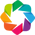

In [33]:
import holoviews as hv
hv.extension('bokeh')

In [34]:
%%opts Points [width=400, height=400, tools=['hover']]
from isochrones.cluster import StarCatalog
import pandas as pd

df = pd.read_hdf('overview/small-test-cluster.h5')
test_stars = StarCatalog(df, bands='gri', props=['parallax'])
test_stars.hr

:Layout
   .Points.I  :Points   [g-i,g_mag]   (g_mag,i_mag,r_mag,is_binary,distance,mass_pri,mass_sec,eep_pri,eep_sec,g_mag_unc,r_mag_unc,i_mag_unc,parallax,parallax_unc,i,g-i,r-i)
   .Points.II :Points   [r-i,r_mag]   (g_mag,i_mag,r_mag,is_binary,distance,mass_pri,mass_sec,eep_pri,eep_sec,g_mag_unc,r_mag_unc,i_mag_unc,parallax,parallax_unc,i,g-i,r-i)

<img src="overview_images/cluster-test.png" width=600>

In [35]:
%%opts Points [width=500, height=500, tools=['hover']]
data = hv.Points(test_stars.ds, kdims=['g-i', 'g_mag'], 
                 vdims=['is_binary', 'distance', 
                        'mass_pri', 'mass_sec', 
                        'eep_pri', 'eep_sec'], label='Simulated data').options(size=5)
model = mist.hr_isochrone('g', 'i', *cluster_pars[:4], mineep=300, maxeep=700, thin=2, label='Model isochrone').options(size=2)
data * model

:Overlay
   .Points.Simulated_data  :Points   [g-i,g_mag]   (is_binary,distance,mass_pri,mass_sec,eep_pri,eep_sec)
   .Points.Model_isochrone :Points   [g-i,g_mag]   (EEP,M,R,Teff,logL,logg,g-i)

## In the real world!

<img src=overview_images/cluster_discovery.png>
Price-Whelan et al., submitted.

<img src="overview_images/hierarch-results.png" width=600>
Price-Whelan et al., submitted.

<img src=overview_images/cluster_corner.png width=600>
Price-Whelan et al., submitted.

## TODO for `isochrones`

* Implement evolution-track grid interpolation in addition to isochrone grids &check;
* Improve treatment of extinction (currently not correct for broad bands/large extinctions) &check;
* Refine/polish cluster fitting, including background model
* Try different multimodal samplers (currently requires MultiNest)
* Implement wrappers for more model grids

## Science to-do

* Fit Gaia co-moving clusters; infer close binary fraction as function of age?
* Validate binary-star fitting using Gaia eclipsing binaries --- can we discover binaries with just photometry + parallax? 
* Test stellar model grids vis-a-vis Gaia RGB data-driven linear model results (Hogg)
* Incorporate gyrochronology models into likelihood (Ruth)
* Look for Cas A birth cluster (Wolfgang)
* [*Insert your ideas here*]